In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import csv
%matplotlib inline
plt.rcParams.update({'font.size': 14})
random.seed()

In [40]:
i = 1
stars = [] #mass of new star every 1/10 year
avg = 0
avglist = [] #average new star mass per 1/10 year
Mtot = 0

while i < 10000001:
    y = random.uniform(0,1)#0.99977) #random.randint(0,1000000) / 1000000
    if avg < 1.65 / 10: #SFR no bigger than 1.65 Msun/year
        if y < 0.778:
            x = ((1.747 - y) / 0.787)**(-1 / 0.3) #mass of random new star via IMF, LMC at 0.07 Msun
#        elif y < 0.99977: #cutoff at 100 Msun (83 Msun: 0.99971)
        else:
            x = ((1 - y) / 0.09)**(-1 / 1.3)
#        else: #above cutoff: start over
#            z = random.uniform(0,1)
#            if z < 0.778:
#                x = ((1.747 - z) / 0.787)**(-1 / 0.3)
#        else:
#            x = ((1 - z) / 0.09)**(-1 / 1.3) #1 in 4423^2 = 20 million both times above cutoff (83: 3450^2 = 12 million)
    else:
        x = 0
    stars.append(x)
    Mtot = Mtot + x
    avg = Mtot / i
#    avg = np.mean(stars)
    avglist.append(avg)
    i = i + 1
    
#print(stars)
#print(avglist)
#starstext = open("stars1.txt", "w")
#for element in stars:
#    starstext.write(str(element) + "\n")
#starstext.close()
#avglisttext = open("avglist1.txt", "w")
#for element in avglist:
#    avglisttext.write(str(element) + "\n")
#avglisttext.close()

In [41]:
plt.rcParams.update({'font.size': 12})

k = 0
j = 0
L = [] #luminosities of new stars via mass-luminosity relation
L10sum = [] #sum of luminosities of new stars in every 10-year interval

while k < 10000000:
    mk = stars[k]
    if mk < 0.43:
        Lk = 0.23 * mk**2.3
    elif mk < 2:
        Lk = mk**4
    elif mk < 55:
        Lk = 1.4 * mk**3.5
    else:
        Lk = 32000 * mk
    L.append(Lk)
    k = k + 1

while j < 10000000 / 100:
    beg = j * 100
    end = beg + 100
    L10 = L[beg:end]
    Lsum = np.mean(L10) * 100
    L10sum.append(Lsum)
    j = j + 1
    
#print(L)
#print(L10sum)
print(r'average Delta L:', round(np.mean(L10sum)), 'Lsun')

L10log = []
l = 0
while l < 10000000 / 100:
    L10suml = L10sum[l]
    if L10suml == 0:
        L10logl = -5
    else:
        L10logl = np.log10(L10suml)
    L10log.append(L10logl)
    l = l + 1

#Ltext = open("L1.txt", "w")
#for element in L:
#    Ltext.write(str(element) + "\n")
#Ltext.close()
#L10sumtext = open("L10sum1.txt", "w")
##for element in L10sum:
#    L10sumtext.write(str(element) + "\n")
#L10sumtext.close()
#L10logtext = open("L10log1.txt", "w")
#for element in L10sum:
#    L10logtext.write(str(element) + "\n")
#L10logtext.close()

#Sim 4: average Delta L: 39524 Lsun
#Sim 5: average Delta L: 30438 Lsun
#bins: 23
#Sim 6 (no UML): average Delta L: 31097 Lsun
#bins:  23
#Sim 7 (no UML): average Delta L: 58786 Lsun
#bins:  23
#Sim 8 no UML: average Delta L: 120256 Lsun
#bins:  19
#Sim 9 no UML: 64364 Lsun
#Sim 10 no UML (1,000,000 steps): 82572 Lsun, 75119
#Sim 11 UML 100 (1,000,000 steps): 36960, 32177
#Sim 12 UML 100, 10^7 steps: 33601
#Sim 13 no UML, 10^7 steps: 97293, max Delta L: 8.52 -> 3.3e8

average Delta L: 97293 Lsun


In [42]:
with open("Sim SFR 13 no UML L10log.txt", "a") as file:
    for item in L10log:
        file.write("%s\n" % item)

In [63]:
fileName=open("Sim SFR 12 UML L10log.txt")
L10log = [float(i) for i in fileName.readlines()]
print(len(L10log))

100000


In [7]:
#Sim 5 100:
#L10log = [2.170720077805665, 1.2176578772489335, 1.732319614796428, 1.3705782146785552, 1.4853010762324759, 2.564614753860364, 2.3096451074590734, 2.019632308544672, 1.7410914725113629, 1.4696166661969468, 2.5086238740914193, 3.6290017722872774, 1.9442904062766775, 1.826275200755951, 3.367169254875468, 2.7964311909622377, 2.5888903584832095, 3.330219163195739, 0.19968479712881973, 1.309552700954055, 2.5841917743783167, 1.6543011936632448, 1.1206934899717993, 2.891490076957805, 5.9778661019532615, -5, -0.745397738578774, 1.1702633135109815, 1.959864728214996, 2.432361236455961, 1.4552582695562184, 3.102764881190548, 2.456448550241377, 2.442447876641646, 1.9325841655754628, 1.234851680994623, 1.5949953338989413, 1.803792018873089, 4.948108354776039, -5, 1.9392338075190434, 2.915529992217288, 4.0633797259488516, 1.9637276299187132, 1.3748290586798875, 2.5694351425702924, 1.662987845898353, 1.5896163882481613, 3.361935296478221, 4.6679745798989405, -0.5859785984564005, 1.3489565410192075, 1.674162352261628, 3.872771395951955, 2.7545471725131248, 4.141866138786277, -0.002121144236303396, 4.721581809428733, 1.3104310303292106, 2.38772990740891, 4.969561178671858, -5, 2.0130976236057907, 1.8086410347608841, 2.3764119837989917, 3.220841663170365, 1.0264988502281196, 2.2083203857970606, 4.151001265048034, 1.0406146838031853, 1.499509802333812, 2.621358452661384, 1.5943253167179874, 1.5629716938207348, 2.5836152855809775, 1.9229696534990919, 4.242731602310923, 1.591516491260132, 2.283850335112946, 3.5049663901672603, 4.7191313223734, -5, 0.40078397082221867, 2.5401390886891377, 2.749078331620657, 3.2644077608979294, 3.0717386225699266, 3.1891383294629794, 2.2721267818578075, 2.107746061216186, 1.8867878032028387, 1.545359108752577, 2.0183954210363035, 3.2762527942000292, 2.5058748685136747, 1.8908238521254928, 6.058688157606866, -5, -5, 1.8565319777638802, 1.7137934685515661, 1.9921879141183716, 2.0667473674400245, 1.6282219219785525, 1.4776600655924765, 2.7484888405823678, 1.0545511599130655, 1.0525849611150584, 2.3221213344069187, 1.0685927536642617, 2.5888513963090856, 3.594693731772205, 1.9220437841075033, 2.1506816844973513, 0.8273614897762667, 2.840241806484335, 3.8231756462973285, 1.1496445415793735, 2.278664702471306, 1.790706434236873, 6.246724155510358, -5, -5, 1.1566065245474806, 1.7933154734520524, 1.4010821460312224, 1.3290961964172863, 1.8930830678313026, 2.3661230987445494, 2.8068463730078337, 0.7167762093715291, 2.2663744139624185, 2.55677611863389, 3.40891927290946, 2.0577309353408286, 3.134919707469521, 0.8301501568304271, 0.9671630454699568, 4.318174900858678, 0.7956611587727285, 2.5197870281782278, 0.6978718110515664, 2.0771277542779587, 2.6193968721332106, 1.738970541915242, 2.1833563492629735, 1.8248451643317676, 1.9908616927199843, 2.6606269417095483, 2.6462100379480034, 1.180231060222396, 4.337486920393364, 0.6699702623519121, 2.2951331803149166, 3.452906116454731, 4.466668136100808, 3.6381360034450205, 3.963651900649009, 3.367292237278569, 2.2234123817722353, 5.398239955719699, -5, 1.1700679119407613, 1.4477839932335084, 3.686041090433773, 1.014268253123302, 2.60450675772239, 2.2154215510243285, 3.629211889769937, 1.2292130287889924, 2.0468768872764005, 0.48210510475336255, 3.726637198083613, 3.0854065408627536, 2.6975108345936434, 1.4700615989023897, 2.362772830666507, 2.9119760995824913, 3.4414895233133893, 1.5516040565517246, 2.8092086079099383, 2.136927983450827, 3.255207307767563, 5.955242314346, -5, -5, 0.6513262625874532, 4.982816408312581, 1.2880201498294843, 1.0525055544888455, 2.5366770624915245, 2.1319262454935393, 2.205264154131253, 1.2992986520846304, 1.8070320335865768, 1.1030919784266873, 4.2619347424538185, 1.299572349743243, 1.9014180617674854, 2.1098842075132676, 1.5034212673972145, 2.3077151879882583, 2.8171192656212307, 1.4454669186688052, 1.8543972112243472, 1.429549733383464, 3.281825797492599, 0.6600718495399646, 1.7570515539093656, 3.444846675987263, 2.87275165459931, 3.569486068050227, 2.516728481980799, 1.3292184642981135, 4.564909945534369, -0.049547975232991974, 2.8095381468409655, 1.519668966105671, 4.8172067492388875, -5, 3.251819362843107, 1.6283030758098993, 1.5864188648554045, 5.207115955657552, -5, 4.7659905310626804, 0.3252632910335238, 1.2384864957935067, 2.872615564137261, 1.7911551881249084, 1.3940381739037842, 1.2723666884378684, 2.2378778369579675, 0.9729047160256137, 1.2535885020158994, 4.231122075415915, 0.626068061992538, 4.412023336783942, 0.9965993366143182, 2.0446315201601712, 1.9696233796323341, 3.8713741058251916, 1.2797865842796436, 1.405606191598297, 2.88787906700467, 2.309271104627805, 2.818909356318022, 2.3225861805656747, 2.738526325574789, 1.9166589886671148, 3.957280623288003, 2.4553122398702554, 2.8684779090766765, 2.0922110074748104, 1.5800969319809133, 0.9922718607127681, 0.9889891234226854, 1.47092986307788, 3.047587284927079, 3.0303028129167635, 1.6526344987268282, 1.6588738605627131, 2.933200452519456, 2.817975019335246, 3.545803397236411, 1.6843618115895047, 1.415401497959575, 2.0889451704312023, 2.659238577712484, 1.1847032806475934, 4.300259918073323, 4.938148847742032, -0.8099935758826328, 4.261930703495352, 2.486817950163404, 2.816636012709227, 4.213343593829355, 2.634090006333198, 2.714690917674374, 0.9850100185987143, 1.3783638602107877, 1.4479883622163279, 2.3211034543896, 4.847809902360124, 1.9298198660291843, 1.9159601685949066, 1.8987142838962359, 1.8355348303717969, 2.836220558590951, 0.48892848669100825, 3.406565299973206, 1.9832923490126217, 2.5215800207624413, 3.040671099581232, 0.5065756899615835, 0.8354795528010188, 1.6131283421645972, 3.829701772652947, 1.7666183362959178, 1.095731564533885, 2.886029184451814, 2.1014048341213982, 2.438920900684136, 2.302652554679218, 1.0274649037978836, 2.7051616952120394, 2.120935048361308, 3.6573131491471904, 3.3608507519851347, 0.9189973483463488, 1.1413776357593015, 4.152000092419838, 1.6859162387683402, 2.357829849853549, 1.4447589207611342, 2.5726491341933833, 1.6451812796052527, 2.5134991032125327, 2.3512599995596872, 2.739154331271478, 1.225660474728823, 1.3870633958258627, 1.1351940320746106, 3.3503801757048532, 2.1905397851120445, 1.3579808702334049, 3.6175621976778585, 4.596510316142874, 0.9787825520239928, 1.7312902771386107, 1.9593100318098549, 2.0980463861101533, 4.512180157152602, 0.7742972468362042, 5.6231678031189185, -5, -5, 0.9620921681046205, 1.9265629222795226, 0.897448297188048, 1.4071109773413144, 2.1073233624500114, 1.8065046173300712, 1.3555936558130481, 2.874145083020029, 1.824257390573451, 2.921937925073927, 1.7653164160807306, 4.583739111366528, 1.7233078258509917, 3.334723841888009, 1.3497138872611532, 2.5456633863007694, 1.7832530643556102, 3.170426569496587, 1.6639587787229126, 2.242711844961972, 0.8252592931972685, 3.3695409226212982, 3.3283480578596283, 1.9328762267387836, 0.9924240304536179, 4.5031191944437206, 1.646144655573986, 1.6929529951829125, 2.2445297837364677, 3.774512309175865, 1.2412853519643583, 0.6544243681661374, 2.120279256719493, 2.90041301829425, 3.3714515816470616, 2.2698746523025255, 1.1336313710752766, 4.158620688317065, 1.7559229801946787, 3.581989904456917, 1.1348327981404864, 2.8360996186385057, 1.5957545990783106, 2.2774164651670668, 2.034917997145968, 1.944858178249013, 1.927359221167195, 1.804440968544455, 2.443582857959086, 0.9367675396065575, 1.0241734388703652, 3.862550916819508, 2.0584696319394613, 1.1607072253581485, 2.8023121423956483, 1.9955770018444392, 1.7879631854721691, 1.6040067818674106, 1.9555470460740736, 2.7945459912624537, 2.1910151955246446, 2.1527575360392897, 5.625942462799925, -5, -5, 1.3298586951696711, 1.605559348582147, 3.4727273717462563, 4.529585322438769, 0.9493183779585072, 1.867188034786553, 5.785191909667341, -5, -5, 1.4890940066920988, 1.7601643604618185, 5.754887987815971, -5, 0.5504653784182028, 4.219363325600188, 1.8633503435495562, 1.2858020771182743, 1.5634213139910087, 3.6244692976011605, 2.7075297233746896, 1.2264862172147233, 0.9816501364922018, 1.4184056597648176, 2.402413751527993, 3.1930456515086862, 2.3388015428149607, 2.775037460390696, 3.990105415542741, 0.5838779718074287, 2.607887195751601, 3.0942090148082992, 1.1799821845675604, 2.5276635534937926, 1.1269101608322925, 2.5160698947478966, 2.5626166101330243, 1.8532413364618892, 2.918900330069937, 3.0314228948521946, 3.723042211819092, 1.9087542362777354, 2.1956634627937195, 2.539592598888754, 1.1893844571535794, 1.354500825174192, 2.2830626419638294, 1.97744751430784, 0.8757899395369073, 0.7817450222345361, 2.5528125839579596, 2.9220457984550303, 2.229357799158852, 1.7234898244670875, 2.573252374903713, 2.644521324866621, 1.0424738645460434, 1.6300377900986935, 1.1038823259792394, 3.5987110635321824, 1.2507392911026458, 1.4468860816772808, 2.630117267644921, 1.306804065154826, 2.41122520362191, 2.033623402061124, 4.032348073401392, 3.37160975139099, 2.147465256266273, 2.876107796928023, 1.4456563464117989, 3.275525545269722, 6.030530446665575, -5, -5, 0.43118265621972485, 1.4063386323369136, 2.1073060376954773, 1.845494469117503, 2.1225292561668856, 2.2132862863415346, 2.124112765830352, 1.2209351763082814, 1.5697016214075652, 2.081501490139471, 1.3274129911151884, 3.336533637164535, 2.679819715748047, 2.341060675517208, 4.111552396698867, 2.686745582306748, 0.41514970049336164, 2.5972762242420577, 1.6919284919244364, 1.8223299069490828, 1.2579548706043981, 1.9552918924755522, 1.395249330369903, 2.6650135617958814, 1.8167086818859384, 3.250721482580638, 1.6957784993854474, 2.348863313084645, 3.236858962765065, 1.968662607773902, 1.1459491074626746, 2.290862240462365, 1.3176441449326195, 5.1148833985800435, -5, 1.7742344967795618, 6.1432851140638425, -5, -5, 2.8802103058771475, 5.004410505437665, -5, 1.2280793761210544, 1.6643263880479797, 2.595077852206117, 2.065020723588994, 4.014420673444299, 2.507479746451709, 2.025593469985275, 3.016123300727123, 2.2768984143030435, 1.5600332026938737, 2.2971683120329365, 1.2595058336624754, 3.1052078659981346, 5.086509396613757, 3.731525604612171, 4.99919121222458, -5, 1.0735429125597629, 0.9012778110054093, 1.8956688033936155, 1.852515576706879, 3.3441865046689823, 0.7035708979791255, 3.8669279294719567, 2.4534621733168054, 1.9167142378959672, 5.987435194780246, -5, -5, 2.277094119263788, 1.6543109814405397, 1.7356277767262303, 1.541769746239683, 2.143207958532107, 1.5181294543361188, 4.146676725322898, 1.4599819152476927, 2.86521712686312, 3.6528291964223456, 4.108760427037421, 1.3128610766836404, 4.9103248623500235, 2.1529074222872544, 5.1895119966418415, -5, 2.6848794124440576, 3.7844897935281523, 1.9884107148958678, 5.1172314456908605, 0.8227715645693627, 2.4334002562489148, 2.0833548786039207, 2.5412698954864563, 4.707365616529532, 1.670779117729655, 3.1433499877328193, 1.9938733841507048, 1.5858755138729608, 1.982201525704607, 3.358976872427362, 2.6201713545833143, 2.3077603057622387, 3.3931669485531204, 2.1276702161970475, 1.6637091105040231, 2.1194358811516114, 2.7001403145390808, 4.245039225626343, 0.38924881857403404, 2.8839538991435525, 2.6906623015809754, 2.66211783830324, 1.819083984473704, 1.7335150248454418, 2.804025831730837, 3.612628694578864, 3.9278204849333824, 2.058625683661073, 2.520816513274663, 2.216373848549319, 2.48538399641896, 2.018260609758919, 3.755594088471087, 1.2841920860998952, 2.5226648315096543, 1.6821465426573072, 2.835669597410843, 2.8067426063663254, 0.8272856437232097, 4.033784748859595, 3.4449774199027816, 2.9973953172533347, 2.691978206050093, 2.280861270320308, 3.2629803475649037, 1.0545953849310845, 0.994050184336577, 1.8104613490837485, 1.689840947567417, 2.681951685474827, 3.978762848152739, 5.506316299899804, -5, 5.561013440180537, -5, 1.5208585352546846, 2.7964196619805066, 3.984937295272706, 4.7209278779487365, 2.070037824456793, 4.880142590332214, 0.5466782510286947, 2.8403510429011605, 6.42542936432171, -5, -5, -5, -5, 6.371775422916557, -5, -5, -5, -5, 1.0268253903016002, 3.9324599218438885, 0.8376360573476819, 2.18869144654212, 1.5769722726613624, 2.507137799934306, 3.137635736824025, 1.9618851511973403, 0.9624850174721875, 2.2978136296758276, 0.909619200025027, 3.8937395213845907, 1.5399479316715006, 0.6526569030278958, 2.2859473183589003, 3.0737304086719495, 0.9602270507557811, 1.1647697833707078, 1.7995834709363563, 2.876824313747775, 3.402630515338128, 1.1958921205918662, 3.4967356508989047, 1.6010975037153183, 2.0905771436864, 2.538535547209927, 2.0555332568855587, 2.6370228637490922, 0.7485620604589989, 0.9800293400053472, 1.3469559739345434, 2.215795595058529, 2.132116505821206, 2.962000749351659, 1.7167975290453446, 2.899316137358542, 2.000375055369979, 0.7355367715281389, 4.46875838775375, 2.6998440630606506, 1.7995806018219191, 1.6126231355166907, 3.0083893766692764, 3.5252682738023964, 1.6984470960714706, 2.8980892951016615, 6.270748183670667, -5, -5, 3.6018101231446615, 2.3748216556529553, 1.1977759775176633, 4.063079133587187, 1.1030788767034636, 4.001994550211865, 1.4345115863309619, 3.608603062635937, 1.9098830621213865, 1.6632009039286402, 2.1516070080903367, 1.9941462435344888, 1.7393745875982392, 2.3834529265898103, 1.6378413684443809, 2.5961955363319964, 1.206160281202154, 3.8587408216992922, 2.2035358860189778, 2.125298927439076, 2.8798174376926706, 1.6502433088922999, 1.1413453358313843, 4.991802622169698, -0.9584154285120583, 2.9443751466865606, 3.791735587912464, 4.365241699021944, 2.320973074516973, 1.4613465665925547, 2.0562718696684077, 2.3115343729086018, 2.6288031254673503, 0.6296728236272945, 3.138160313862112, 2.093857452474618, 2.164082192935224, 2.264999896658783, 1.826209853865831, 4.526250964054575, 1.3968160200090478, 1.2799500653353757, 1.1022508277388696, 2.0788817662789976, 2.828311154846709, 2.83736339072288, 1.2283283902811277, 3.9826686228117736, 1.0381596964361584, 3.70011259988874, 3.838377270979879, 1.599483575714355, 5.236033448356537, -5, 0.30335110708258967, 1.0631955750814996, 2.9464042883883774, 1.9171270604380917, 3.5475556390211693, 1.6259707120677593, 1.239190691396155, 1.8496968830402196, 2.977848277258209, 2.5381897098099144, 3.8518691984037137, 2.6564168816262774, 0.8564541448566001, 2.8677773406368527, 2.024036007693942, 2.1017888337794375, 2.5048360666045397, 1.2243711850240946, 2.5402910396355676, 1.5995633252041546, 1.7592148078743295, 3.0708893049494534, 1.7235374674489494, 1.6870238739300163, 1.0259504171502676, 2.074595374166456, 0.49866098899992894, 2.64107837995148, 2.5887332259911022, 1.9286170912500973, 2.287760138674156, 3.28721727941762, 5.3328422183759985, -5, 5.2360279325947126, -5, 1.8239372736913129, 2.118432314017794, 1.5235313130002077, 1.6419036851017688, 1.698484226544082, 1.953011291741065, 1.8828061463413588, 5.470024253008164, -5, 3.28437519086426, 1.0910438678821954, 4.411216044414779, 0.9838499861364941, 3.5234500332806156, 1.939213546220958, 1.0895209669376835, 0.9041690103021217, 2.2627409221260053, 1.0747315519691725, 1.3038846758397005, 1.624391708116532, 2.0645169509512056, 2.5706119149692377, 2.089981103204025, 2.055586928296226, 1.3674873275278232, 3.560874936605199, 1.540333144150582, 4.741913334823549, 2.3327659086798143, 1.7121187056883742, 3.437425703607898, 1.6344633149891592, 2.6292696981147725, 1.0824508285273358, 3.9694698356778564, 1.8271069635786246, 2.703805642649395, 4.962396067628345, -5, 1.3498805762742128, 4.916646404702152, -5, 2.9879522336645845, 3.623539640095138, 0.5898895596210665, 1.1302869130522064, 1.3899464725644772, 3.59177087318339, 3.6528406362789756, 2.3774953277202577, 2.9558961243491475, 1.6715310224146591, 1.2213880413445557, 2.826270019383586, 2.2019833162033704, 2.6556387251716345, 1.7019375301671738, 2.4035887093329222, 2.773289193775833, 3.2190145963613994, 1.7734620183714618, 2.7333481802438984, 3.9827674462750733, 3.0388424230487083, 1.586364852299623, 2.347421539803437, 3.369292320003418, 2.4142902257767083, 3.224135215239089, 2.405751668372372, 1.799527447840903, 2.064082499785833, 1.5584890090256727, 1.8447228916981224, 2.120651928106773, 0.7480397919816544, 0.7546635511990399, 0.9623500332904015, 1.6697909731170972, 1.226654652389156, 3.6012201425583648, 1.3542835064108774, 1.6739556804424434, 6.421956943400656, -5, -5, -5, -5, -0.22516693981622307, 3.402734562596455, 1.9012080267215832, 4.658936238577875, -5, 3.2516949517017273, 2.70434930517368, 1.3025087435151954, 2.4907077132769047, 1.9443155656020017, 1.8576299175003144, 1.3469027276394416, 5.646741233066233, -5, 1.3198579037392313, 2.461256873826775, 2.920277590516504, 3.411677961970192, 1.1355405878607931, 1.047127875364449, 1.9203987466350216, 1.2010712709557312, 2.647391412276664, 1.254991096482826, 1.2262249722121197, 2.552175238130485, 2.7895186746532894, 3.1283168635702747, 2.4560170095204383, 3.153392491975728, 3.1362375917731353, 2.6189131487732666, 4.42156841503388, -0.9963849050348059, 4.124958191053211, 1.7618185089902825, 2.598261949017214, 0.4414749988554755, 1.6026869001919248, 1.4484426000286406, 1.6365847707479837, 4.253152236224222, 1.0856208386397368, 4.96027469124942, -0.537354518440841, 4.7190092466016065, 3.2937758052635546, 2.1445305620696495, 2.6195583326871223, 2.398104977325978, 2.1967606498339403, 4.008787923725138, 1.5217121131688445, 2.908017100552255, 3.308514680042185, 1.1846204003203873, 6.285733446282917, -5, -5, 1.5284259414931172, 1.4536737976956664, 1.4837016865287513, 1.4781760668754023, 1.1005964082297135, 2.0819403216027297, 1.626001126050607, 3.2072872172617637, 0.8858035507294328, 2.629729125499942, 3.3826772613028897, 1.8950682504648182, 1.0666586567731688, 3.0564610087882254, 1.1435131860476375, 2.9213816868028992, 2.0748831274083903, 1.5002891682050221, 3.25227961553833, 1.9660912987287416, 3.2159847521765657, 2.3808034045614104, 1.3074775864394899, 2.9212719125750026, 6.389067316742135, -5, -5, -5, -0.2912022387560275, 2.15544111167865, 1.4789336771753108, 0.8269605777066789, 0.8981842205793902, 3.8566680998130574, 0.9592574797320021, 1.942630437450422, 1.802878405740963, 3.3256842828119804, 3.9042663836476894, 2.4698428571500974, 1.155611521111117, 1.5886207246702004, 1.0724710265269688, 1.1666000564098709, 3.5362223387750022, 1.7686769984806534, 3.9623808318996625, 1.5625143259453078, 2.5390287502269917, 4.148209910603184, 4.351276124820393, 1.2174514213400314, 1.4692377743021081, 3.67712433569848, 1.2922902329154833, 1.8376063540883472, 0.9780536847867143, 1.5127373453053166, 2.7761386915179904, 2.540760470519139, 1.761839872564618, 4.29017830318522, -0.11870473641519368, 3.274766794668278, 2.0058022947882916, 0.6550149093712104, 2.666944801367298, 4.604761261964047, 0.07786214038829246, 2.299005213937395, 3.4535465581416913, 5.293985123857667]
#Sim 6 no UML:
L10log = [3.023455707945787, 3.353818530598732, 2.716177803755738, 2.5523222944916246, 3.4150926989616965, 2.274407512100392, 2.358702812653342, 2.6654723140497967, 1.9732972813453296, 1.1435586295306226, 1.3022093994838468, 2.481998472933071, 1.1054779646151878, 4.13121730923923, 2.061021300507217, 2.837060596581254, 4.230949166730545, 0.8862138148603639, 0.6491430139286363, 2.1178288753081813, 1.482682329254792, 4.504417192477071, 2.9244598982610466, 1.614130572274581, 1.8380394041092512, 3.366993494910118, 2.5551507070988793, 3.719184028967208, 1.7417763812929437, 2.3008689178104955, 6.345114316043135, -5, -5, -5, 0.7327666153380561, 0.9649698243277162, 3.004998234159353, 2.25421512298149, 3.87183810823546, 0.7104117983356626, 1.934671716543613, 3.741357712195133, 2.452789887045313, 3.9201632017083843, 0.22132857158888286, 2.3065999935950803, 2.1144957827030804, 2.8435173745110087, 1.6893105860200672, 1.3692425007248608, 2.2391357089052235, 2.3630804573670554, 1.4720637029710089, 2.9090620127247906, 5.874162679979399, -5, -5, 0.7341424445712581, 4.65092265285597, 1.9780100251308907, 2.7962710543195968, 3.5580371042078545, 4.3756515023019755, 3.797009614925336, 1.3023707379908083, 1.05832158451223, 4.287201783287886, 1.908808227032075, 1.8374170912601724, 3.84569327291649, 0.1885087660381722, 1.4485449046396612, 2.1152915097948704, 5.2022317952564485, -5, 4.956285501569861, -5, 2.249414296321736, 1.9218387630541205, 2.3192910675756213, 1.1288062644114603, 2.389269244686868, 3.8057804030068385, 2.1873490497056784, 1.9258431352553873, 4.608887555882091, 0.6895723329449092, 1.300506266690506, 2.3646769865380826, 1.7264992937229509, 2.3068719929035617, 1.071123277324596, 1.952436445399833, 3.3962632122805614, 3.4833000679362094, 1.005968926334373, 3.6732096906047107, 1.2782912243711109, 2.8767545671714783, 2.5740876309392693, 2.3444799662816425, 0.6686886035553374, 1.5706851762744347, 1.8561556316070056, 0.8063780857790664, 1.9812621940223336, 2.4035212162441737, 1.4120110101538463, 2.8502562258026956, 2.999492564459318, 0.43341258324849774, 0.38295527278371894, 3.2727655525756316, 2.0275571626634887, 3.7224123587724276, 1.1095016407434752, 3.273907450801962, 2.146197085406655, 2.4064206372043393, 3.2011594970709645, 2.9794296819812724, 1.500397896528137, 3.8608599597427506, 1.5834719152711616, 3.109225892503954, 3.1660061009881817, 1.6430853828526386, 2.8214398491453, 1.5219206166282688, 4.290855771805054, 0.193240006351555, 4.255374631224839, 2.25917624303169, 0.7688562313545245, 1.17996237195543, 2.578601729895, 1.6129834589890242, 2.513539205687145, 1.5109045253251805, 3.173821369874533, 2.165617107720976, 0.9940074634670295, 2.4081184903132966, 1.7800621317384713, 1.569092278244615, 1.650385638210632, 2.69012925790652, 3.1706907369212063, 2.740284423844375, 3.657263748937217, 2.7707566724234387, 0.7720040174548571, 1.647752987106296, 1.7564307522303022, 0.7317907330925917, 1.7608463655251436, 5.3003679153078, 1.1637928171692276, 1.7644058960121103, 2.27153416114137, 1.346014275226625, 4.086928004662012, 1.7896714827392661, 2.990965573121548, 5.200231208637323, 1.9136842382589216, 3.0828785903801714, 2.0444940539320338, 4.028337079710416, 0.09219472441603266, 2.2693987971815264, 2.6076674268732307, 1.9104155707991965, 2.607575788333691, 1.467263958868749, 3.3342838319090236, 5.925726880295898, -5, -5, 2.148697240949648, 3.11198567281571, 1.4421122302772702, 2.017797157622162, 0.9451652348114772, 2.41553049360658, 2.331084258745907, 1.097863922646232, 1.0568894387806227, 3.090906078897735, 3.082063711699197, 1.5787245709365745, 2.762677997608701, 1.255912331269257, 3.3970079871679957, 4.917266347093912, -5, 1.749859498942897, 3.474258482698687, 0.8251045743534899, 4.188458479971934, 1.255637443736504, 2.3289150779383867, 2.571313001041649, 4.355049147867527, 0.5581652323384763, 1.015906569256497, 2.9966498779601456, 2.50778187318507, 2.7748948234151607, 1.554904963277478, 1.1695330549922676, 2.2951838599885837, 1.0069065701428124, 2.849617109514144, 1.6024112126343515, 2.994344740957793, 3.044341966240386, 1.6512971875802294, 2.1378795389347283, 2.836695787671228, 2.303304095646739, 1.8725860900628304, 1.6375869938602112, 0.9575929318590944, 0.910087962894291, 3.247945608736446, 4.881519329390218, -0.7149142362762346, 3.171030768294819, 2.0846231737206153, 1.471782428223976, 2.162191282455631, 2.536955113043701, 3.283288239032052, 2.5087242857480185, 1.899118674674801, 2.5398406168617917, 2.284179802556626, 2.3446571729806673, 0.975941932224459, 1.6782741222640445, 4.784426327208266, -5, 1.6414010622099175, 2.566174227836719, 4.812395850327252, 2.613177924345624, 3.6729117541676928, 2.7920400784479646, 2.3068388175818173, 1.7641453768115782, 2.96452126220498, 2.5948034800997553, 1.1600145697298911, 1.9764584336109994, 2.1733832171095724, 1.8528927694925397, 2.1099329240807765, 5.865389888965593, -5, -5, 0.8979815563970804, 1.2248656866904448, 2.3843713068123034, 2.1675045457941713, 2.2636310137190074, 2.5904331131268648, 3.6817029862215156, 2.6759848223400247, 1.6957492169948742, 3.502945202902875, 4.284203228026089, 1.1164051067312035, 1.8953054042239743, 3.5185471472788956, 1.8403987826630348, 1.7547706947965376, 2.6067609488146366, 3.4060037330303143, 4.463537870128211, 1.8824360123971902, 2.662926443724233, 1.6807704254957203, 1.801654800534607, 3.5466881821460126, 1.6743409132303015, 3.751851926533287, 2.9289147093338794, 1.903864557830516, 3.925892597530106, 0.32909238145631053, 1.3755739796122899, 1.1629172334864546, 1.1598775513745077, 1.6859143741023044, 2.0804828653805587, 0.7587893771224901, 2.707286804654875, 3.702051336394942, 0.8932213031282027, 2.0377112549351506, 3.7421044350315515, 0.6716639462441818, 2.2358516946413958, 2.3096235417848896, 6.416242671239478, -5, -5, -5, -5, 1.5646533008920989, 1.3089221841460659, 3.3660907733597405, 0.6036514568758182, 3.2714608712075197, 4.342794331546419, 0.9488585586646094, 3.1477258609750685, 3.2597114135680245, 2.729844125671139, 1.692099378543499, 2.496851388431162, 1.6008361354367364, 2.2249691942971426, 2.000083624223872, 3.6527354228285023, 1.0286521633884351, 4.320005409792185, -0.13501927503682984, 4.944818243406713, -5, 2.8789052522497567, 2.6682436253916997, 1.949475083225103, 4.431195276866371, 2.4354648878108636, 1.594207866772245, 1.2396938578297771, 2.5424851010853375, 0.6531319061336599, 2.0283912471089915, 3.029240785028466, 1.9110988056758542, 2.75845675144334, 2.2356013645755852, 2.0615908155631057, 2.4335832542495104, 1.1104221622893675, 2.8413314046338636, 1.1647771676120071, 2.2199844891218588, 3.930636353022298, 2.3034188921323966, 2.2533412894617197, 4.324212119100497, 3.163231148325247, 1.6403882947708812, 1.5784716793852753, 1.494998017301259, 5.170380269317984, -5, 1.6402021592631781, 3.6299272442081025, 6.312855009854803, -5, -5, -5, 2.140058268235365, 3.6427379632007995, 2.0416105973089143, 3.1238784776536335, 2.545812125382726, 1.3011686102591085, 3.2831486980824667, 2.399325324401681, 5.920282214416107, -5, -5, 2.9437265250705114, 4.853527996588232, -5, 1.5405695448005656, 2.7984675237309338, 2.1269564185081977, 2.862413689892965, 1.2388193781654062, 2.6452483337979116, 2.259754992429779, 1.9432480083898225, 0.8906003393945887, 1.8429842383735542, 3.6912765137816526, 4.057924052796409, 0.04315453659868338, 2.3031185010560864, 2.3947376481027947, 1.7527072815321467, 2.341472337039101, 2.0311705251650283, 4.740600964630899, 0.11922646894157996, 2.42314487380716, 2.8857192052442886, 2.5310439990145306, 1.211239149764068, 3.4024884805548044, 1.3711787346521265, 3.0416862248742427, 2.1171898067255177, 3.823319343069844, 2.4952904877304563, 2.176905235828579, 2.482113920312848, 1.899140886287679, 2.836336625732882, 3.1780988345019807, 2.493263722116552, 1.376875526441419, 5.740812139793264, -5, -5, 1.3944574938470455, 2.6964304833868833, 1.6907555826480207, 2.545241895619511, 1.8539974741840655, 1.2846817910649642, 1.5597796965187292, 2.2777159071496182, 1.8498524890196917, 1.8920335451260852, 3.397832902033151, 3.4438678233087616, 2.0622921969599477, 1.277557559208667, 3.3990480412623287, 1.71513207755732, 3.7149970630828273, 3.272145543435091, 2.5064564899286603, 1.617255579819597, 2.556878676528542, 1.5106195305974763, 2.3269298138505676, 2.1392687346200336, 1.9175610215407146, 2.9171228542895733, 2.7821731145476165, 2.335552526651887, 2.4164206428418082, 1.93244915461393, 2.097098593606574, 3.820490919932221, 1.1693931011831986, 3.971263452095733, 1.9379088853651323, 2.3157484491790874, 2.7275526912769985, 1.9278543082533357, 2.1125114976046238, 1.8357117174320035, 1.86239481584464, 1.364243024912898, 4.257073310746446, 1.4042711435003863, 0.9367671918753623, 2.022830005320641, 3.326645596463, 1.8134785365285861, 3.923891505236126, 3.6245474567073748, 1.9689015501907094, 2.8951786975466383, 1.2796324211086034, 3.0770889805815815, 2.1876121660096866, 3.0365311793333487, 3.820748922617275, 1.9475413204315135, 1.3391274048001658, 1.611903150169423, 2.006594440036382, 3.6374384049292434, 3.8386664655674148, 1.6742043048721216, 2.685800288018541, 2.15359853973518, 1.8835256786740573, 1.3204825691536966, 3.434680876604592, 1.9135824757371631, 1.2250438794576006, 1.9957544622564851, 1.2482420477197975, 3.4251832490055, 3.6128514415244446, 2.5992806942541824, 2.5947261152082794, 2.3216468123414766, 2.2799502284889037, 1.550945444186394, 1.888405060568496, 2.4425032050953757, 1.9090747696217067, 3.6736602356479664, 2.4990250146385673, 1.1423408794669714, 1.3432148646751612, 2.8360445576513973, 3.6957968243329424, 3.379337082845589, 1.9475679723370252, 3.8636946066990108, 2.127562735839263, 1.5743554128380506, 0.7531753741228047, 2.2948764687458176, 1.0237290888217339, 1.9115605277123742, 0.9028700158622796, 0.8477238878806465, 1.0349406000748744, 1.616604454400924, 1.876679897745772, 3.474954798049536, 1.7359102300932392, 3.065885387123359, 1.128318816387137, 1.2184614553477549, 2.762795169652438, 3.593975432813865, 2.0234083876970583, 3.0696881422401123, 1.9000542502017108, 0.675888403062394, 1.1449732747143866, 1.2510204704323848, 2.048713964347462, 5.786887500542127, -5, -5, 0.820305664300951, 2.400134893318234, 3.7888492313742543, 3.9192849850075397, 1.2894760211055336, 1.5967421622270006, 1.2562665430305402, 3.07149894090271, 3.013695334182762, 3.281569360490023, 2.001512982565382, 5.754899626286129, -5, -5, 2.5814607177713973, 1.6629500954876115, 1.3173862759247363, 1.5939425772693083, 1.1150553862819241, 3.9686405622134355, 1.9916515489278155, 3.740533531291258, 2.624017884209128, 2.8497811550273093, 2.239249891024582, 0.9984597274563537, 3.152172083753786, 0.8567359446474402, 2.6276391985759546, 2.3129659520990344, 2.052600920651905, 1.7146548054426647, 2.063529892392105, 2.265458618608712, 2.4875309324354355, 2.1403719399748047, 1.8195462869755203, 3.592796873995668, 5.4540652924701565, -5, 0.7786767777962622, 2.2955400711217386, 3.4459204469566234, 2.3545665919700767, 1.9168301640482608, 6.487971489169005, -5, -5, -5, -5, -5, 1.8774870769962222, 2.1811670384196997, 3.889358784910772, 1.2071052432079399, 2.9574298053876475, 1.659818673441774, 2.177136221193028, 1.6751190357378678, 0.686836465899204, 3.833988679740968, 0.3560618659480675, 3.185249029213968, 2.7776211927113947, 1.0366325933566125, 0.8771297381926141, 2.4966997796231243, 1.6808386164419222, 2.502608017487945, 3.813146197957201, 2.152322277612127, 1.3881510348655024, 1.9738184471733489, 5.728453402424865, -5, 2.110636497135443, 1.3601665803839142, 3.728404466905436, 2.6144642410944314, 3.3917719437644944, 3.1349643404450607, 1.0635454658800296, 4.843500931000768, 0.6018752182939979, 2.0625195633969002, 4.562541767359349, 2.5775983819641826, 2.053881017830022, 1.5988318567532998, 3.1241462927055332, 3.880330722186664, 1.8554005273293726, 1.642605593541653, 2.1892477688907226, 3.073805700511002, 1.4906029745041116, 1.976361873605311, 2.3022679653364024, 3.1662475991139094, 1.5751796066199972, 1.4328097365790273, 3.4923844059219213, 2.556291300026922, 1.6391626690729306, 1.954036279185336, 1.2308519649926541, 4.040335688773968, 1.907052538894715, 1.8391360809189112, 4.654025390085526, 0.6338365697434716, 2.130000763921177, 1.649357248418439, 3.122739809319358, 3.0230515312225665, 2.420777841685612, 6.809151087557223, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 0.4240887793867151, 3.1681651486820614, 2.446837268329871, 3.021985266901557, 5.889865199404101, -5, -5, 1.4821058546238244, 1.9705460882647103, 2.5821215360289393, 1.7890254095103304, 4.101686230035627, 0.4812068091359829, 3.7087812913111615, 4.067984882938991, 3.9652899532353074, 3.9124793800493984, 1.8018586300431974, 1.3769666908790632, 0.9273501361433691, 2.4355433311802615, 0.6783980405474929, 2.3206188842024353, 4.666073141367602, -5, 2.4144445206834293, 3.4628009794827217, 1.3165085187360503, 3.304696112265669, 6.095992159759627, -5, -5, 1.1850392822573865, 2.1522756237857745, 2.1094841333489587, 1.2779732034381386, 3.90628438101518, 2.9835932730162487, 3.7822247720256748, 3.0325945607451135, 2.470067997405851, 3.101018453936217, 1.9311372998961074, 2.0779249244094187, 3.313831425832166, 2.7451915142822205, 3.1690270610573585, 3.1779526818295194, 1.5495382998428753, 3.2701188067045748, 2.1755623638082553, 1.6815370905986955, 4.6352828824294, 2.879257234208707, 1.6159570013343905, 1.8769971080513401, 1.7223265848854599, 2.4798777324289185, 2.0156827287873726, 1.7233321342398007, 3.585604156436024, 1.2403211079494403, 3.575427728478986, 1.7391893108561123, 1.9102323021950631, 2.5164163003889017, 3.296745650279507, 1.351617010131335, 1.1190886647964595, 3.370490085095067, 2.3028961176260583, 1.1350662930407647, 3.830628444433668, 0.717985841259436, 3.1362904557880027, 1.4751098761657029, 1.5775285386990634, 3.0308988906542695, 2.165146761639102, 1.922839290972323, 1.794160675988795, 1.965821151590892, 2.1815181676679645, 1.423161653939352, 2.584276046750121, 6.332537131759315, -5, -5, -5, 2.4627255393786776, 1.7791342277047453, 4.509807514369775, 1.2124571188914193, 2.0167750588458113, 1.8372489078054826, 3.1401534122487305, 2.1579337003852745, 2.539792481898037, 3.5326440504579453, 1.6587893195502619, 4.667625222400682, 2.5364829933516146, 2.4280081203177746, 3.1147803134865364, 2.8086912265884587, 3.2616027869898914, 1.164674140156274, 2.630237017951497, 5.002533466379533, -5, 2.2779034142700194, 2.449462208845295, 3.199593805706829, 2.9948804911787423, 3.5139995934068033, 2.8872977884527606, 3.1813527841772706, 0.7961434241382079, 3.0924581021405544, 1.3378867692185388, 3.4645853522185006, 2.1989296571088612, 2.2156780963062905, 2.144364321693814, 1.467441795016579, 1.1605417208420925, 2.5355959025949155, 2.976551795032238, 2.065234965505468, 1.5144355645033243, 3.3644478390689594, 2.411143288337329, 3.111393270968357, 1.2346005408908078, 3.4943867168760283, 1.707668184537813, 4.977294564116196, -5, 1.3424379938355335, 2.7201501511345882, 2.5219527065961436, 2.1088630212797375, 1.109115130379384, 1.6175203608115896, 2.4187499523493896, 1.715223050808492, 2.706937161543461, 1.8097214984367884, 1.876085958755849, 1.5949011574767331, 1.5584050255879447, 0.7980566060112816, 2.8594971111121144, 2.1137313401375843, 2.094262777635738, 2.081409346259386, 1.9236486761605036, 0.9142469312969788, 2.7302466789922275, 2.092544621330026, 3.3525721138701474, 2.9117189240228734, 4.087264276203053, 1.596846997662219, 4.07795759543817, 0.7914706672971578, 0.9691887692346465, 1.4085797278229841, 1.8520125328546675, 2.663431835051667, 3.364910551239788, 2.4037240360396934, 1.9127294909689514, 1.4149379401064448, 1.7506350734846627, 2.0252326319138523, 1.2074819174851021, 4.52292057530091, 1.1842301038802128, 2.661371501208407, 0.8863013933846775, 1.613328947470389, 1.747739166939703, 2.878285224967775, 3.208133951276616, 2.00008389515311, 3.237011936207658, 0.9345903850500764, 3.034761458424017, 1.961573226713131, 3.038649389910294, 3.7075115014024824, 1.5048637583901547, 1.575346389305741, 0.516356326341822, 2.1047190115518064, 2.254704099091133, 2.4148670284940343, 2.470327420895737, 1.4260364807941603, 2.615762834033846, 1.3923722210173324, 2.007657342864595, 1.4310484700776234, 1.5198923124394599, 1.3906109681513852, 1.8414397738134074, 1.9644376946741078, 2.097296504784763, 1.8287056712234528, 2.420713332145708, 1.726348423609192, 1.7674590902883769, 1.1490208414225913, 1.3982847977387276, 1.1346561505238713, 1.2329736028848117, 2.598838391169146, 1.5095268938507698, 1.179127354587618, 2.1110683561230634, 2.1144026440510193, 0.4576101015067985, 3.032460636487533, 3.4631914304653044, 1.7538271991369343, 1.992210072179292, 3.4545632596615543, 1.6931525519193307, 2.690539922998683, 2.497511666801491, 1.733914454306603, 1.6789326984722637, 2.4316709110838186, 2.435572020294293, 1.9066190413818433, 2.6747693976414957, 2.8443224614398623, 1.895358366566084, 3.635818904305317, 2.089957156061017, 2.2331353675987877, 0.7560063908268674, 1.471378682108052, 4.747227244570854, 4.260585692929924, -0.4064052517260059, 2.1138358892023734, 4.972024683773888, -5, 3.7652892588861127, 2.914365198016655, 1.4559393411921306, 6.117252363339299, -5, -5, -0.042614010356940756, 3.4777129611575983, 3.4440178695082015, 1.4541813231828553, 1.6512772526374868, 5.087421690325033, -5, 1.6359028258576276, 1.894296448738092, 4.02402526751696, 2.2782758688059586, 1.3709439359215552, 1.0781115548297726, 2.5234168160141732, 1.0203695936980746, 3.4674777189079196, 3.0924335214030325, 2.0856692148156935, 4.09977308789548, 1.7985972878799137, 1.8141053146001986, 2.327587888442082, 1.5533453388934018, 2.1585484789570235, 3.8554947061783356, 1.5975763440400055, 0.8315408903287764, 0.953653191089735, 2.5416814459039117, 3.6358739646836966, 0.7207242869469493, 1.5860290203725698, 3.8780556882729846, 2.0891698108399535, 4.588935808668235, 1.4065652881807547, 1.6817004686171972, 2.975551448582957, 2.932421834694825, 2.46867935490522, 1.2233984132196196, 2.7415961920780907, 1.614486668769929, 3.7777545642895403, 1.2483804985918865, 1.0699289166014194, 1.2879372814622168, 2.19336379614215, 2.5195453824411556, 2.9096658392497874, 2.2432806865914525, 1.7533031438216522, 0.992243452210253, 2.8319581031456478, 2.6960911565330283, 1.789966344634717, 4.1642727121044585, 2.3063973682338688, 1.7212970596369161, 2.4991524370772638, 3.0005266854673858, 3.423907556895647, 0.9932785512359795, 2.5283432814899327, 2.371300771417157, 3.6601467090880373, 2.6525552680856674, 2.365387242714144, 1.9576195667084064, 5.0126400107072016, -1.4983238197559317, 2.3347075193309133, 1.8958646929785437, 0.9502176784048284, 4.230176411540032]
avglist = []
with open('Sim SFR 5 100 avglist.txt', 'r') as csvfile: #Sim SFR 6 no UML avglist.txt
    reader = csv.reader(csvfile, delimiter=' ')
    csvdata = list(reader)
    for i in range(len(csvdata)):
        avglist.append(float(csvdata[i][0]))
        
q25 = np.percentile(L10log, 25)
q75 = np.percentile(L10log, 75)
binwidth = 2*(q75 - q25)*len(L10log)**(-1/3)
#print(binwidth)
bins = round(max(L10log) - min(L10log) / binwidth)

avglistyear = [i * 10 for i in avglist]
#years = [avglist.index(x) / 10 for x in avglist]

n = 0
x = 0
years = []
while n < 100000:
    x = x + 0.1
    years.append(x)
    n = n + 1

In [9]:
print('UML:', np.mean(avglistyear))

UML: 1.651690428605238


In [6]:
print('no UML:', np.mean(avglistyear))

no UML: 1.652370030808847


In [49]:
print(max(L10log))

8.520752005976544


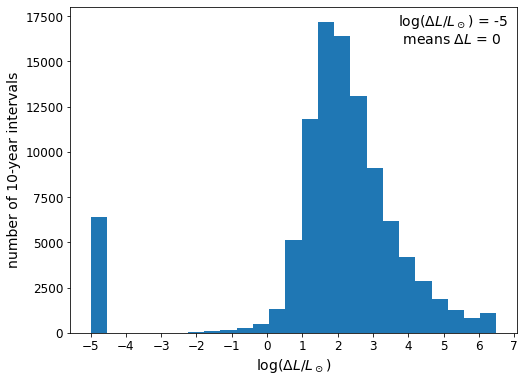

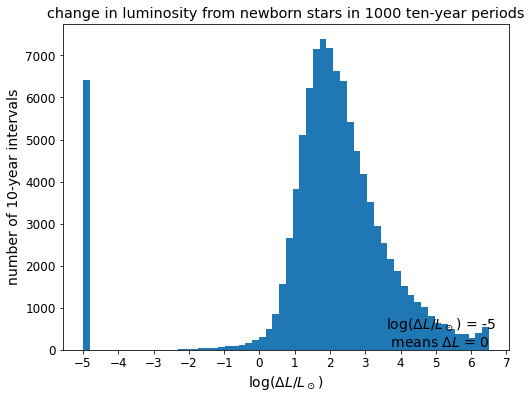

In [67]:
#Sim 5 100:
#L10log = [2.170720077805665, 1.2176578772489335, 1.732319614796428, 1.3705782146785552, 1.4853010762324759, 2.564614753860364, 2.3096451074590734, 2.019632308544672, 1.7410914725113629, 1.4696166661969468, 2.5086238740914193, 3.6290017722872774, 1.9442904062766775, 1.826275200755951, 3.367169254875468, 2.7964311909622377, 2.5888903584832095, 3.330219163195739, 0.19968479712881973, 1.309552700954055, 2.5841917743783167, 1.6543011936632448, 1.1206934899717993, 2.891490076957805, 5.9778661019532615, -5, -0.745397738578774, 1.1702633135109815, 1.959864728214996, 2.432361236455961, 1.4552582695562184, 3.102764881190548, 2.456448550241377, 2.442447876641646, 1.9325841655754628, 1.234851680994623, 1.5949953338989413, 1.803792018873089, 4.948108354776039, -5, 1.9392338075190434, 2.915529992217288, 4.0633797259488516, 1.9637276299187132, 1.3748290586798875, 2.5694351425702924, 1.662987845898353, 1.5896163882481613, 3.361935296478221, 4.6679745798989405, -0.5859785984564005, 1.3489565410192075, 1.674162352261628, 3.872771395951955, 2.7545471725131248, 4.141866138786277, -0.002121144236303396, 4.721581809428733, 1.3104310303292106, 2.38772990740891, 4.969561178671858, -5, 2.0130976236057907, 1.8086410347608841, 2.3764119837989917, 3.220841663170365, 1.0264988502281196, 2.2083203857970606, 4.151001265048034, 1.0406146838031853, 1.499509802333812, 2.621358452661384, 1.5943253167179874, 1.5629716938207348, 2.5836152855809775, 1.9229696534990919, 4.242731602310923, 1.591516491260132, 2.283850335112946, 3.5049663901672603, 4.7191313223734, -5, 0.40078397082221867, 2.5401390886891377, 2.749078331620657, 3.2644077608979294, 3.0717386225699266, 3.1891383294629794, 2.2721267818578075, 2.107746061216186, 1.8867878032028387, 1.545359108752577, 2.0183954210363035, 3.2762527942000292, 2.5058748685136747, 1.8908238521254928, 6.058688157606866, -5, -5, 1.8565319777638802, 1.7137934685515661, 1.9921879141183716, 2.0667473674400245, 1.6282219219785525, 1.4776600655924765, 2.7484888405823678, 1.0545511599130655, 1.0525849611150584, 2.3221213344069187, 1.0685927536642617, 2.5888513963090856, 3.594693731772205, 1.9220437841075033, 2.1506816844973513, 0.8273614897762667, 2.840241806484335, 3.8231756462973285, 1.1496445415793735, 2.278664702471306, 1.790706434236873, 6.246724155510358, -5, -5, 1.1566065245474806, 1.7933154734520524, 1.4010821460312224, 1.3290961964172863, 1.8930830678313026, 2.3661230987445494, 2.8068463730078337, 0.7167762093715291, 2.2663744139624185, 2.55677611863389, 3.40891927290946, 2.0577309353408286, 3.134919707469521, 0.8301501568304271, 0.9671630454699568, 4.318174900858678, 0.7956611587727285, 2.5197870281782278, 0.6978718110515664, 2.0771277542779587, 2.6193968721332106, 1.738970541915242, 2.1833563492629735, 1.8248451643317676, 1.9908616927199843, 2.6606269417095483, 2.6462100379480034, 1.180231060222396, 4.337486920393364, 0.6699702623519121, 2.2951331803149166, 3.452906116454731, 4.466668136100808, 3.6381360034450205, 3.963651900649009, 3.367292237278569, 2.2234123817722353, 5.398239955719699, -5, 1.1700679119407613, 1.4477839932335084, 3.686041090433773, 1.014268253123302, 2.60450675772239, 2.2154215510243285, 3.629211889769937, 1.2292130287889924, 2.0468768872764005, 0.48210510475336255, 3.726637198083613, 3.0854065408627536, 2.6975108345936434, 1.4700615989023897, 2.362772830666507, 2.9119760995824913, 3.4414895233133893, 1.5516040565517246, 2.8092086079099383, 2.136927983450827, 3.255207307767563, 5.955242314346, -5, -5, 0.6513262625874532, 4.982816408312581, 1.2880201498294843, 1.0525055544888455, 2.5366770624915245, 2.1319262454935393, 2.205264154131253, 1.2992986520846304, 1.8070320335865768, 1.1030919784266873, 4.2619347424538185, 1.299572349743243, 1.9014180617674854, 2.1098842075132676, 1.5034212673972145, 2.3077151879882583, 2.8171192656212307, 1.4454669186688052, 1.8543972112243472, 1.429549733383464, 3.281825797492599, 0.6600718495399646, 1.7570515539093656, 3.444846675987263, 2.87275165459931, 3.569486068050227, 2.516728481980799, 1.3292184642981135, 4.564909945534369, -0.049547975232991974, 2.8095381468409655, 1.519668966105671, 4.8172067492388875, -5, 3.251819362843107, 1.6283030758098993, 1.5864188648554045, 5.207115955657552, -5, 4.7659905310626804, 0.3252632910335238, 1.2384864957935067, 2.872615564137261, 1.7911551881249084, 1.3940381739037842, 1.2723666884378684, 2.2378778369579675, 0.9729047160256137, 1.2535885020158994, 4.231122075415915, 0.626068061992538, 4.412023336783942, 0.9965993366143182, 2.0446315201601712, 1.9696233796323341, 3.8713741058251916, 1.2797865842796436, 1.405606191598297, 2.88787906700467, 2.309271104627805, 2.818909356318022, 2.3225861805656747, 2.738526325574789, 1.9166589886671148, 3.957280623288003, 2.4553122398702554, 2.8684779090766765, 2.0922110074748104, 1.5800969319809133, 0.9922718607127681, 0.9889891234226854, 1.47092986307788, 3.047587284927079, 3.0303028129167635, 1.6526344987268282, 1.6588738605627131, 2.933200452519456, 2.817975019335246, 3.545803397236411, 1.6843618115895047, 1.415401497959575, 2.0889451704312023, 2.659238577712484, 1.1847032806475934, 4.300259918073323, 4.938148847742032, -0.8099935758826328, 4.261930703495352, 2.486817950163404, 2.816636012709227, 4.213343593829355, 2.634090006333198, 2.714690917674374, 0.9850100185987143, 1.3783638602107877, 1.4479883622163279, 2.3211034543896, 4.847809902360124, 1.9298198660291843, 1.9159601685949066, 1.8987142838962359, 1.8355348303717969, 2.836220558590951, 0.48892848669100825, 3.406565299973206, 1.9832923490126217, 2.5215800207624413, 3.040671099581232, 0.5065756899615835, 0.8354795528010188, 1.6131283421645972, 3.829701772652947, 1.7666183362959178, 1.095731564533885, 2.886029184451814, 2.1014048341213982, 2.438920900684136, 2.302652554679218, 1.0274649037978836, 2.7051616952120394, 2.120935048361308, 3.6573131491471904, 3.3608507519851347, 0.9189973483463488, 1.1413776357593015, 4.152000092419838, 1.6859162387683402, 2.357829849853549, 1.4447589207611342, 2.5726491341933833, 1.6451812796052527, 2.5134991032125327, 2.3512599995596872, 2.739154331271478, 1.225660474728823, 1.3870633958258627, 1.1351940320746106, 3.3503801757048532, 2.1905397851120445, 1.3579808702334049, 3.6175621976778585, 4.596510316142874, 0.9787825520239928, 1.7312902771386107, 1.9593100318098549, 2.0980463861101533, 4.512180157152602, 0.7742972468362042, 5.6231678031189185, -5, -5, 0.9620921681046205, 1.9265629222795226, 0.897448297188048, 1.4071109773413144, 2.1073233624500114, 1.8065046173300712, 1.3555936558130481, 2.874145083020029, 1.824257390573451, 2.921937925073927, 1.7653164160807306, 4.583739111366528, 1.7233078258509917, 3.334723841888009, 1.3497138872611532, 2.5456633863007694, 1.7832530643556102, 3.170426569496587, 1.6639587787229126, 2.242711844961972, 0.8252592931972685, 3.3695409226212982, 3.3283480578596283, 1.9328762267387836, 0.9924240304536179, 4.5031191944437206, 1.646144655573986, 1.6929529951829125, 2.2445297837364677, 3.774512309175865, 1.2412853519643583, 0.6544243681661374, 2.120279256719493, 2.90041301829425, 3.3714515816470616, 2.2698746523025255, 1.1336313710752766, 4.158620688317065, 1.7559229801946787, 3.581989904456917, 1.1348327981404864, 2.8360996186385057, 1.5957545990783106, 2.2774164651670668, 2.034917997145968, 1.944858178249013, 1.927359221167195, 1.804440968544455, 2.443582857959086, 0.9367675396065575, 1.0241734388703652, 3.862550916819508, 2.0584696319394613, 1.1607072253581485, 2.8023121423956483, 1.9955770018444392, 1.7879631854721691, 1.6040067818674106, 1.9555470460740736, 2.7945459912624537, 2.1910151955246446, 2.1527575360392897, 5.625942462799925, -5, -5, 1.3298586951696711, 1.605559348582147, 3.4727273717462563, 4.529585322438769, 0.9493183779585072, 1.867188034786553, 5.785191909667341, -5, -5, 1.4890940066920988, 1.7601643604618185, 5.754887987815971, -5, 0.5504653784182028, 4.219363325600188, 1.8633503435495562, 1.2858020771182743, 1.5634213139910087, 3.6244692976011605, 2.7075297233746896, 1.2264862172147233, 0.9816501364922018, 1.4184056597648176, 2.402413751527993, 3.1930456515086862, 2.3388015428149607, 2.775037460390696, 3.990105415542741, 0.5838779718074287, 2.607887195751601, 3.0942090148082992, 1.1799821845675604, 2.5276635534937926, 1.1269101608322925, 2.5160698947478966, 2.5626166101330243, 1.8532413364618892, 2.918900330069937, 3.0314228948521946, 3.723042211819092, 1.9087542362777354, 2.1956634627937195, 2.539592598888754, 1.1893844571535794, 1.354500825174192, 2.2830626419638294, 1.97744751430784, 0.8757899395369073, 0.7817450222345361, 2.5528125839579596, 2.9220457984550303, 2.229357799158852, 1.7234898244670875, 2.573252374903713, 2.644521324866621, 1.0424738645460434, 1.6300377900986935, 1.1038823259792394, 3.5987110635321824, 1.2507392911026458, 1.4468860816772808, 2.630117267644921, 1.306804065154826, 2.41122520362191, 2.033623402061124, 4.032348073401392, 3.37160975139099, 2.147465256266273, 2.876107796928023, 1.4456563464117989, 3.275525545269722, 6.030530446665575, -5, -5, 0.43118265621972485, 1.4063386323369136, 2.1073060376954773, 1.845494469117503, 2.1225292561668856, 2.2132862863415346, 2.124112765830352, 1.2209351763082814, 1.5697016214075652, 2.081501490139471, 1.3274129911151884, 3.336533637164535, 2.679819715748047, 2.341060675517208, 4.111552396698867, 2.686745582306748, 0.41514970049336164, 2.5972762242420577, 1.6919284919244364, 1.8223299069490828, 1.2579548706043981, 1.9552918924755522, 1.395249330369903, 2.6650135617958814, 1.8167086818859384, 3.250721482580638, 1.6957784993854474, 2.348863313084645, 3.236858962765065, 1.968662607773902, 1.1459491074626746, 2.290862240462365, 1.3176441449326195, 5.1148833985800435, -5, 1.7742344967795618, 6.1432851140638425, -5, -5, 2.8802103058771475, 5.004410505437665, -5, 1.2280793761210544, 1.6643263880479797, 2.595077852206117, 2.065020723588994, 4.014420673444299, 2.507479746451709, 2.025593469985275, 3.016123300727123, 2.2768984143030435, 1.5600332026938737, 2.2971683120329365, 1.2595058336624754, 3.1052078659981346, 5.086509396613757, 3.731525604612171, 4.99919121222458, -5, 1.0735429125597629, 0.9012778110054093, 1.8956688033936155, 1.852515576706879, 3.3441865046689823, 0.7035708979791255, 3.8669279294719567, 2.4534621733168054, 1.9167142378959672, 5.987435194780246, -5, -5, 2.277094119263788, 1.6543109814405397, 1.7356277767262303, 1.541769746239683, 2.143207958532107, 1.5181294543361188, 4.146676725322898, 1.4599819152476927, 2.86521712686312, 3.6528291964223456, 4.108760427037421, 1.3128610766836404, 4.9103248623500235, 2.1529074222872544, 5.1895119966418415, -5, 2.6848794124440576, 3.7844897935281523, 1.9884107148958678, 5.1172314456908605, 0.8227715645693627, 2.4334002562489148, 2.0833548786039207, 2.5412698954864563, 4.707365616529532, 1.670779117729655, 3.1433499877328193, 1.9938733841507048, 1.5858755138729608, 1.982201525704607, 3.358976872427362, 2.6201713545833143, 2.3077603057622387, 3.3931669485531204, 2.1276702161970475, 1.6637091105040231, 2.1194358811516114, 2.7001403145390808, 4.245039225626343, 0.38924881857403404, 2.8839538991435525, 2.6906623015809754, 2.66211783830324, 1.819083984473704, 1.7335150248454418, 2.804025831730837, 3.612628694578864, 3.9278204849333824, 2.058625683661073, 2.520816513274663, 2.216373848549319, 2.48538399641896, 2.018260609758919, 3.755594088471087, 1.2841920860998952, 2.5226648315096543, 1.6821465426573072, 2.835669597410843, 2.8067426063663254, 0.8272856437232097, 4.033784748859595, 3.4449774199027816, 2.9973953172533347, 2.691978206050093, 2.280861270320308, 3.2629803475649037, 1.0545953849310845, 0.994050184336577, 1.8104613490837485, 1.689840947567417, 2.681951685474827, 3.978762848152739, 5.506316299899804, -5, 5.561013440180537, -5, 1.5208585352546846, 2.7964196619805066, 3.984937295272706, 4.7209278779487365, 2.070037824456793, 4.880142590332214, 0.5466782510286947, 2.8403510429011605, 6.42542936432171, -5, -5, -5, -5, 6.371775422916557, -5, -5, -5, -5, 1.0268253903016002, 3.9324599218438885, 0.8376360573476819, 2.18869144654212, 1.5769722726613624, 2.507137799934306, 3.137635736824025, 1.9618851511973403, 0.9624850174721875, 2.2978136296758276, 0.909619200025027, 3.8937395213845907, 1.5399479316715006, 0.6526569030278958, 2.2859473183589003, 3.0737304086719495, 0.9602270507557811, 1.1647697833707078, 1.7995834709363563, 2.876824313747775, 3.402630515338128, 1.1958921205918662, 3.4967356508989047, 1.6010975037153183, 2.0905771436864, 2.538535547209927, 2.0555332568855587, 2.6370228637490922, 0.7485620604589989, 0.9800293400053472, 1.3469559739345434, 2.215795595058529, 2.132116505821206, 2.962000749351659, 1.7167975290453446, 2.899316137358542, 2.000375055369979, 0.7355367715281389, 4.46875838775375, 2.6998440630606506, 1.7995806018219191, 1.6126231355166907, 3.0083893766692764, 3.5252682738023964, 1.6984470960714706, 2.8980892951016615, 6.270748183670667, -5, -5, 3.6018101231446615, 2.3748216556529553, 1.1977759775176633, 4.063079133587187, 1.1030788767034636, 4.001994550211865, 1.4345115863309619, 3.608603062635937, 1.9098830621213865, 1.6632009039286402, 2.1516070080903367, 1.9941462435344888, 1.7393745875982392, 2.3834529265898103, 1.6378413684443809, 2.5961955363319964, 1.206160281202154, 3.8587408216992922, 2.2035358860189778, 2.125298927439076, 2.8798174376926706, 1.6502433088922999, 1.1413453358313843, 4.991802622169698, -0.9584154285120583, 2.9443751466865606, 3.791735587912464, 4.365241699021944, 2.320973074516973, 1.4613465665925547, 2.0562718696684077, 2.3115343729086018, 2.6288031254673503, 0.6296728236272945, 3.138160313862112, 2.093857452474618, 2.164082192935224, 2.264999896658783, 1.826209853865831, 4.526250964054575, 1.3968160200090478, 1.2799500653353757, 1.1022508277388696, 2.0788817662789976, 2.828311154846709, 2.83736339072288, 1.2283283902811277, 3.9826686228117736, 1.0381596964361584, 3.70011259988874, 3.838377270979879, 1.599483575714355, 5.236033448356537, -5, 0.30335110708258967, 1.0631955750814996, 2.9464042883883774, 1.9171270604380917, 3.5475556390211693, 1.6259707120677593, 1.239190691396155, 1.8496968830402196, 2.977848277258209, 2.5381897098099144, 3.8518691984037137, 2.6564168816262774, 0.8564541448566001, 2.8677773406368527, 2.024036007693942, 2.1017888337794375, 2.5048360666045397, 1.2243711850240946, 2.5402910396355676, 1.5995633252041546, 1.7592148078743295, 3.0708893049494534, 1.7235374674489494, 1.6870238739300163, 1.0259504171502676, 2.074595374166456, 0.49866098899992894, 2.64107837995148, 2.5887332259911022, 1.9286170912500973, 2.287760138674156, 3.28721727941762, 5.3328422183759985, -5, 5.2360279325947126, -5, 1.8239372736913129, 2.118432314017794, 1.5235313130002077, 1.6419036851017688, 1.698484226544082, 1.953011291741065, 1.8828061463413588, 5.470024253008164, -5, 3.28437519086426, 1.0910438678821954, 4.411216044414779, 0.9838499861364941, 3.5234500332806156, 1.939213546220958, 1.0895209669376835, 0.9041690103021217, 2.2627409221260053, 1.0747315519691725, 1.3038846758397005, 1.624391708116532, 2.0645169509512056, 2.5706119149692377, 2.089981103204025, 2.055586928296226, 1.3674873275278232, 3.560874936605199, 1.540333144150582, 4.741913334823549, 2.3327659086798143, 1.7121187056883742, 3.437425703607898, 1.6344633149891592, 2.6292696981147725, 1.0824508285273358, 3.9694698356778564, 1.8271069635786246, 2.703805642649395, 4.962396067628345, -5, 1.3498805762742128, 4.916646404702152, -5, 2.9879522336645845, 3.623539640095138, 0.5898895596210665, 1.1302869130522064, 1.3899464725644772, 3.59177087318339, 3.6528406362789756, 2.3774953277202577, 2.9558961243491475, 1.6715310224146591, 1.2213880413445557, 2.826270019383586, 2.2019833162033704, 2.6556387251716345, 1.7019375301671738, 2.4035887093329222, 2.773289193775833, 3.2190145963613994, 1.7734620183714618, 2.7333481802438984, 3.9827674462750733, 3.0388424230487083, 1.586364852299623, 2.347421539803437, 3.369292320003418, 2.4142902257767083, 3.224135215239089, 2.405751668372372, 1.799527447840903, 2.064082499785833, 1.5584890090256727, 1.8447228916981224, 2.120651928106773, 0.7480397919816544, 0.7546635511990399, 0.9623500332904015, 1.6697909731170972, 1.226654652389156, 3.6012201425583648, 1.3542835064108774, 1.6739556804424434, 6.421956943400656, -5, -5, -5, -5, -0.22516693981622307, 3.402734562596455, 1.9012080267215832, 4.658936238577875, -5, 3.2516949517017273, 2.70434930517368, 1.3025087435151954, 2.4907077132769047, 1.9443155656020017, 1.8576299175003144, 1.3469027276394416, 5.646741233066233, -5, 1.3198579037392313, 2.461256873826775, 2.920277590516504, 3.411677961970192, 1.1355405878607931, 1.047127875364449, 1.9203987466350216, 1.2010712709557312, 2.647391412276664, 1.254991096482826, 1.2262249722121197, 2.552175238130485, 2.7895186746532894, 3.1283168635702747, 2.4560170095204383, 3.153392491975728, 3.1362375917731353, 2.6189131487732666, 4.42156841503388, -0.9963849050348059, 4.124958191053211, 1.7618185089902825, 2.598261949017214, 0.4414749988554755, 1.6026869001919248, 1.4484426000286406, 1.6365847707479837, 4.253152236224222, 1.0856208386397368, 4.96027469124942, -0.537354518440841, 4.7190092466016065, 3.2937758052635546, 2.1445305620696495, 2.6195583326871223, 2.398104977325978, 2.1967606498339403, 4.008787923725138, 1.5217121131688445, 2.908017100552255, 3.308514680042185, 1.1846204003203873, 6.285733446282917, -5, -5, 1.5284259414931172, 1.4536737976956664, 1.4837016865287513, 1.4781760668754023, 1.1005964082297135, 2.0819403216027297, 1.626001126050607, 3.2072872172617637, 0.8858035507294328, 2.629729125499942, 3.3826772613028897, 1.8950682504648182, 1.0666586567731688, 3.0564610087882254, 1.1435131860476375, 2.9213816868028992, 2.0748831274083903, 1.5002891682050221, 3.25227961553833, 1.9660912987287416, 3.2159847521765657, 2.3808034045614104, 1.3074775864394899, 2.9212719125750026, 6.389067316742135, -5, -5, -5, -0.2912022387560275, 2.15544111167865, 1.4789336771753108, 0.8269605777066789, 0.8981842205793902, 3.8566680998130574, 0.9592574797320021, 1.942630437450422, 1.802878405740963, 3.3256842828119804, 3.9042663836476894, 2.4698428571500974, 1.155611521111117, 1.5886207246702004, 1.0724710265269688, 1.1666000564098709, 3.5362223387750022, 1.7686769984806534, 3.9623808318996625, 1.5625143259453078, 2.5390287502269917, 4.148209910603184, 4.351276124820393, 1.2174514213400314, 1.4692377743021081, 3.67712433569848, 1.2922902329154833, 1.8376063540883472, 0.9780536847867143, 1.5127373453053166, 2.7761386915179904, 2.540760470519139, 1.761839872564618, 4.29017830318522, -0.11870473641519368, 3.274766794668278, 2.0058022947882916, 0.6550149093712104, 2.666944801367298, 4.604761261964047, 0.07786214038829246, 2.299005213937395, 3.4535465581416913, 5.293985123857667]
#Sim 6 no UML:
#L10log = [3.023455707945787, 3.353818530598732, 2.716177803755738, 2.5523222944916246, 3.4150926989616965, 2.274407512100392, 2.358702812653342, 2.6654723140497967, 1.9732972813453296, 1.1435586295306226, 1.3022093994838468, 2.481998472933071, 1.1054779646151878, 4.13121730923923, 2.061021300507217, 2.837060596581254, 4.230949166730545, 0.8862138148603639, 0.6491430139286363, 2.1178288753081813, 1.482682329254792, 4.504417192477071, 2.9244598982610466, 1.614130572274581, 1.8380394041092512, 3.366993494910118, 2.5551507070988793, 3.719184028967208, 1.7417763812929437, 2.3008689178104955, 6.345114316043135, -5, -5, -5, 0.7327666153380561, 0.9649698243277162, 3.004998234159353, 2.25421512298149, 3.87183810823546, 0.7104117983356626, 1.934671716543613, 3.741357712195133, 2.452789887045313, 3.9201632017083843, 0.22132857158888286, 2.3065999935950803, 2.1144957827030804, 2.8435173745110087, 1.6893105860200672, 1.3692425007248608, 2.2391357089052235, 2.3630804573670554, 1.4720637029710089, 2.9090620127247906, 5.874162679979399, -5, -5, 0.7341424445712581, 4.65092265285597, 1.9780100251308907, 2.7962710543195968, 3.5580371042078545, 4.3756515023019755, 3.797009614925336, 1.3023707379908083, 1.05832158451223, 4.287201783287886, 1.908808227032075, 1.8374170912601724, 3.84569327291649, 0.1885087660381722, 1.4485449046396612, 2.1152915097948704, 5.2022317952564485, -5, 4.956285501569861, -5, 2.249414296321736, 1.9218387630541205, 2.3192910675756213, 1.1288062644114603, 2.389269244686868, 3.8057804030068385, 2.1873490497056784, 1.9258431352553873, 4.608887555882091, 0.6895723329449092, 1.300506266690506, 2.3646769865380826, 1.7264992937229509, 2.3068719929035617, 1.071123277324596, 1.952436445399833, 3.3962632122805614, 3.4833000679362094, 1.005968926334373, 3.6732096906047107, 1.2782912243711109, 2.8767545671714783, 2.5740876309392693, 2.3444799662816425, 0.6686886035553374, 1.5706851762744347, 1.8561556316070056, 0.8063780857790664, 1.9812621940223336, 2.4035212162441737, 1.4120110101538463, 2.8502562258026956, 2.999492564459318, 0.43341258324849774, 0.38295527278371894, 3.2727655525756316, 2.0275571626634887, 3.7224123587724276, 1.1095016407434752, 3.273907450801962, 2.146197085406655, 2.4064206372043393, 3.2011594970709645, 2.9794296819812724, 1.500397896528137, 3.8608599597427506, 1.5834719152711616, 3.109225892503954, 3.1660061009881817, 1.6430853828526386, 2.8214398491453, 1.5219206166282688, 4.290855771805054, 0.193240006351555, 4.255374631224839, 2.25917624303169, 0.7688562313545245, 1.17996237195543, 2.578601729895, 1.6129834589890242, 2.513539205687145, 1.5109045253251805, 3.173821369874533, 2.165617107720976, 0.9940074634670295, 2.4081184903132966, 1.7800621317384713, 1.569092278244615, 1.650385638210632, 2.69012925790652, 3.1706907369212063, 2.740284423844375, 3.657263748937217, 2.7707566724234387, 0.7720040174548571, 1.647752987106296, 1.7564307522303022, 0.7317907330925917, 1.7608463655251436, 5.3003679153078, 1.1637928171692276, 1.7644058960121103, 2.27153416114137, 1.346014275226625, 4.086928004662012, 1.7896714827392661, 2.990965573121548, 5.200231208637323, 1.9136842382589216, 3.0828785903801714, 2.0444940539320338, 4.028337079710416, 0.09219472441603266, 2.2693987971815264, 2.6076674268732307, 1.9104155707991965, 2.607575788333691, 1.467263958868749, 3.3342838319090236, 5.925726880295898, -5, -5, 2.148697240949648, 3.11198567281571, 1.4421122302772702, 2.017797157622162, 0.9451652348114772, 2.41553049360658, 2.331084258745907, 1.097863922646232, 1.0568894387806227, 3.090906078897735, 3.082063711699197, 1.5787245709365745, 2.762677997608701, 1.255912331269257, 3.3970079871679957, 4.917266347093912, -5, 1.749859498942897, 3.474258482698687, 0.8251045743534899, 4.188458479971934, 1.255637443736504, 2.3289150779383867, 2.571313001041649, 4.355049147867527, 0.5581652323384763, 1.015906569256497, 2.9966498779601456, 2.50778187318507, 2.7748948234151607, 1.554904963277478, 1.1695330549922676, 2.2951838599885837, 1.0069065701428124, 2.849617109514144, 1.6024112126343515, 2.994344740957793, 3.044341966240386, 1.6512971875802294, 2.1378795389347283, 2.836695787671228, 2.303304095646739, 1.8725860900628304, 1.6375869938602112, 0.9575929318590944, 0.910087962894291, 3.247945608736446, 4.881519329390218, -0.7149142362762346, 3.171030768294819, 2.0846231737206153, 1.471782428223976, 2.162191282455631, 2.536955113043701, 3.283288239032052, 2.5087242857480185, 1.899118674674801, 2.5398406168617917, 2.284179802556626, 2.3446571729806673, 0.975941932224459, 1.6782741222640445, 4.784426327208266, -5, 1.6414010622099175, 2.566174227836719, 4.812395850327252, 2.613177924345624, 3.6729117541676928, 2.7920400784479646, 2.3068388175818173, 1.7641453768115782, 2.96452126220498, 2.5948034800997553, 1.1600145697298911, 1.9764584336109994, 2.1733832171095724, 1.8528927694925397, 2.1099329240807765, 5.865389888965593, -5, -5, 0.8979815563970804, 1.2248656866904448, 2.3843713068123034, 2.1675045457941713, 2.2636310137190074, 2.5904331131268648, 3.6817029862215156, 2.6759848223400247, 1.6957492169948742, 3.502945202902875, 4.284203228026089, 1.1164051067312035, 1.8953054042239743, 3.5185471472788956, 1.8403987826630348, 1.7547706947965376, 2.6067609488146366, 3.4060037330303143, 4.463537870128211, 1.8824360123971902, 2.662926443724233, 1.6807704254957203, 1.801654800534607, 3.5466881821460126, 1.6743409132303015, 3.751851926533287, 2.9289147093338794, 1.903864557830516, 3.925892597530106, 0.32909238145631053, 1.3755739796122899, 1.1629172334864546, 1.1598775513745077, 1.6859143741023044, 2.0804828653805587, 0.7587893771224901, 2.707286804654875, 3.702051336394942, 0.8932213031282027, 2.0377112549351506, 3.7421044350315515, 0.6716639462441818, 2.2358516946413958, 2.3096235417848896, 6.416242671239478, -5, -5, -5, -5, 1.5646533008920989, 1.3089221841460659, 3.3660907733597405, 0.6036514568758182, 3.2714608712075197, 4.342794331546419, 0.9488585586646094, 3.1477258609750685, 3.2597114135680245, 2.729844125671139, 1.692099378543499, 2.496851388431162, 1.6008361354367364, 2.2249691942971426, 2.000083624223872, 3.6527354228285023, 1.0286521633884351, 4.320005409792185, -0.13501927503682984, 4.944818243406713, -5, 2.8789052522497567, 2.6682436253916997, 1.949475083225103, 4.431195276866371, 2.4354648878108636, 1.594207866772245, 1.2396938578297771, 2.5424851010853375, 0.6531319061336599, 2.0283912471089915, 3.029240785028466, 1.9110988056758542, 2.75845675144334, 2.2356013645755852, 2.0615908155631057, 2.4335832542495104, 1.1104221622893675, 2.8413314046338636, 1.1647771676120071, 2.2199844891218588, 3.930636353022298, 2.3034188921323966, 2.2533412894617197, 4.324212119100497, 3.163231148325247, 1.6403882947708812, 1.5784716793852753, 1.494998017301259, 5.170380269317984, -5, 1.6402021592631781, 3.6299272442081025, 6.312855009854803, -5, -5, -5, 2.140058268235365, 3.6427379632007995, 2.0416105973089143, 3.1238784776536335, 2.545812125382726, 1.3011686102591085, 3.2831486980824667, 2.399325324401681, 5.920282214416107, -5, -5, 2.9437265250705114, 4.853527996588232, -5, 1.5405695448005656, 2.7984675237309338, 2.1269564185081977, 2.862413689892965, 1.2388193781654062, 2.6452483337979116, 2.259754992429779, 1.9432480083898225, 0.8906003393945887, 1.8429842383735542, 3.6912765137816526, 4.057924052796409, 0.04315453659868338, 2.3031185010560864, 2.3947376481027947, 1.7527072815321467, 2.341472337039101, 2.0311705251650283, 4.740600964630899, 0.11922646894157996, 2.42314487380716, 2.8857192052442886, 2.5310439990145306, 1.211239149764068, 3.4024884805548044, 1.3711787346521265, 3.0416862248742427, 2.1171898067255177, 3.823319343069844, 2.4952904877304563, 2.176905235828579, 2.482113920312848, 1.899140886287679, 2.836336625732882, 3.1780988345019807, 2.493263722116552, 1.376875526441419, 5.740812139793264, -5, -5, 1.3944574938470455, 2.6964304833868833, 1.6907555826480207, 2.545241895619511, 1.8539974741840655, 1.2846817910649642, 1.5597796965187292, 2.2777159071496182, 1.8498524890196917, 1.8920335451260852, 3.397832902033151, 3.4438678233087616, 2.0622921969599477, 1.277557559208667, 3.3990480412623287, 1.71513207755732, 3.7149970630828273, 3.272145543435091, 2.5064564899286603, 1.617255579819597, 2.556878676528542, 1.5106195305974763, 2.3269298138505676, 2.1392687346200336, 1.9175610215407146, 2.9171228542895733, 2.7821731145476165, 2.335552526651887, 2.4164206428418082, 1.93244915461393, 2.097098593606574, 3.820490919932221, 1.1693931011831986, 3.971263452095733, 1.9379088853651323, 2.3157484491790874, 2.7275526912769985, 1.9278543082533357, 2.1125114976046238, 1.8357117174320035, 1.86239481584464, 1.364243024912898, 4.257073310746446, 1.4042711435003863, 0.9367671918753623, 2.022830005320641, 3.326645596463, 1.8134785365285861, 3.923891505236126, 3.6245474567073748, 1.9689015501907094, 2.8951786975466383, 1.2796324211086034, 3.0770889805815815, 2.1876121660096866, 3.0365311793333487, 3.820748922617275, 1.9475413204315135, 1.3391274048001658, 1.611903150169423, 2.006594440036382, 3.6374384049292434, 3.8386664655674148, 1.6742043048721216, 2.685800288018541, 2.15359853973518, 1.8835256786740573, 1.3204825691536966, 3.434680876604592, 1.9135824757371631, 1.2250438794576006, 1.9957544622564851, 1.2482420477197975, 3.4251832490055, 3.6128514415244446, 2.5992806942541824, 2.5947261152082794, 2.3216468123414766, 2.2799502284889037, 1.550945444186394, 1.888405060568496, 2.4425032050953757, 1.9090747696217067, 3.6736602356479664, 2.4990250146385673, 1.1423408794669714, 1.3432148646751612, 2.8360445576513973, 3.6957968243329424, 3.379337082845589, 1.9475679723370252, 3.8636946066990108, 2.127562735839263, 1.5743554128380506, 0.7531753741228047, 2.2948764687458176, 1.0237290888217339, 1.9115605277123742, 0.9028700158622796, 0.8477238878806465, 1.0349406000748744, 1.616604454400924, 1.876679897745772, 3.474954798049536, 1.7359102300932392, 3.065885387123359, 1.128318816387137, 1.2184614553477549, 2.762795169652438, 3.593975432813865, 2.0234083876970583, 3.0696881422401123, 1.9000542502017108, 0.675888403062394, 1.1449732747143866, 1.2510204704323848, 2.048713964347462, 5.786887500542127, -5, -5, 0.820305664300951, 2.400134893318234, 3.7888492313742543, 3.9192849850075397, 1.2894760211055336, 1.5967421622270006, 1.2562665430305402, 3.07149894090271, 3.013695334182762, 3.281569360490023, 2.001512982565382, 5.754899626286129, -5, -5, 2.5814607177713973, 1.6629500954876115, 1.3173862759247363, 1.5939425772693083, 1.1150553862819241, 3.9686405622134355, 1.9916515489278155, 3.740533531291258, 2.624017884209128, 2.8497811550273093, 2.239249891024582, 0.9984597274563537, 3.152172083753786, 0.8567359446474402, 2.6276391985759546, 2.3129659520990344, 2.052600920651905, 1.7146548054426647, 2.063529892392105, 2.265458618608712, 2.4875309324354355, 2.1403719399748047, 1.8195462869755203, 3.592796873995668, 5.4540652924701565, -5, 0.7786767777962622, 2.2955400711217386, 3.4459204469566234, 2.3545665919700767, 1.9168301640482608, 6.487971489169005, -5, -5, -5, -5, -5, 1.8774870769962222, 2.1811670384196997, 3.889358784910772, 1.2071052432079399, 2.9574298053876475, 1.659818673441774, 2.177136221193028, 1.6751190357378678, 0.686836465899204, 3.833988679740968, 0.3560618659480675, 3.185249029213968, 2.7776211927113947, 1.0366325933566125, 0.8771297381926141, 2.4966997796231243, 1.6808386164419222, 2.502608017487945, 3.813146197957201, 2.152322277612127, 1.3881510348655024, 1.9738184471733489, 5.728453402424865, -5, 2.110636497135443, 1.3601665803839142, 3.728404466905436, 2.6144642410944314, 3.3917719437644944, 3.1349643404450607, 1.0635454658800296, 4.843500931000768, 0.6018752182939979, 2.0625195633969002, 4.562541767359349, 2.5775983819641826, 2.053881017830022, 1.5988318567532998, 3.1241462927055332, 3.880330722186664, 1.8554005273293726, 1.642605593541653, 2.1892477688907226, 3.073805700511002, 1.4906029745041116, 1.976361873605311, 2.3022679653364024, 3.1662475991139094, 1.5751796066199972, 1.4328097365790273, 3.4923844059219213, 2.556291300026922, 1.6391626690729306, 1.954036279185336, 1.2308519649926541, 4.040335688773968, 1.907052538894715, 1.8391360809189112, 4.654025390085526, 0.6338365697434716, 2.130000763921177, 1.649357248418439, 3.122739809319358, 3.0230515312225665, 2.420777841685612, 6.809151087557223, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, 0.4240887793867151, 3.1681651486820614, 2.446837268329871, 3.021985266901557, 5.889865199404101, -5, -5, 1.4821058546238244, 1.9705460882647103, 2.5821215360289393, 1.7890254095103304, 4.101686230035627, 0.4812068091359829, 3.7087812913111615, 4.067984882938991, 3.9652899532353074, 3.9124793800493984, 1.8018586300431974, 1.3769666908790632, 0.9273501361433691, 2.4355433311802615, 0.6783980405474929, 2.3206188842024353, 4.666073141367602, -5, 2.4144445206834293, 3.4628009794827217, 1.3165085187360503, 3.304696112265669, 6.095992159759627, -5, -5, 1.1850392822573865, 2.1522756237857745, 2.1094841333489587, 1.2779732034381386, 3.90628438101518, 2.9835932730162487, 3.7822247720256748, 3.0325945607451135, 2.470067997405851, 3.101018453936217, 1.9311372998961074, 2.0779249244094187, 3.313831425832166, 2.7451915142822205, 3.1690270610573585, 3.1779526818295194, 1.5495382998428753, 3.2701188067045748, 2.1755623638082553, 1.6815370905986955, 4.6352828824294, 2.879257234208707, 1.6159570013343905, 1.8769971080513401, 1.7223265848854599, 2.4798777324289185, 2.0156827287873726, 1.7233321342398007, 3.585604156436024, 1.2403211079494403, 3.575427728478986, 1.7391893108561123, 1.9102323021950631, 2.5164163003889017, 3.296745650279507, 1.351617010131335, 1.1190886647964595, 3.370490085095067, 2.3028961176260583, 1.1350662930407647, 3.830628444433668, 0.717985841259436, 3.1362904557880027, 1.4751098761657029, 1.5775285386990634, 3.0308988906542695, 2.165146761639102, 1.922839290972323, 1.794160675988795, 1.965821151590892, 2.1815181676679645, 1.423161653939352, 2.584276046750121, 6.332537131759315, -5, -5, -5, 2.4627255393786776, 1.7791342277047453, 4.509807514369775, 1.2124571188914193, 2.0167750588458113, 1.8372489078054826, 3.1401534122487305, 2.1579337003852745, 2.539792481898037, 3.5326440504579453, 1.6587893195502619, 4.667625222400682, 2.5364829933516146, 2.4280081203177746, 3.1147803134865364, 2.8086912265884587, 3.2616027869898914, 1.164674140156274, 2.630237017951497, 5.002533466379533, -5, 2.2779034142700194, 2.449462208845295, 3.199593805706829, 2.9948804911787423, 3.5139995934068033, 2.8872977884527606, 3.1813527841772706, 0.7961434241382079, 3.0924581021405544, 1.3378867692185388, 3.4645853522185006, 2.1989296571088612, 2.2156780963062905, 2.144364321693814, 1.467441795016579, 1.1605417208420925, 2.5355959025949155, 2.976551795032238, 2.065234965505468, 1.5144355645033243, 3.3644478390689594, 2.411143288337329, 3.111393270968357, 1.2346005408908078, 3.4943867168760283, 1.707668184537813, 4.977294564116196, -5, 1.3424379938355335, 2.7201501511345882, 2.5219527065961436, 2.1088630212797375, 1.109115130379384, 1.6175203608115896, 2.4187499523493896, 1.715223050808492, 2.706937161543461, 1.8097214984367884, 1.876085958755849, 1.5949011574767331, 1.5584050255879447, 0.7980566060112816, 2.8594971111121144, 2.1137313401375843, 2.094262777635738, 2.081409346259386, 1.9236486761605036, 0.9142469312969788, 2.7302466789922275, 2.092544621330026, 3.3525721138701474, 2.9117189240228734, 4.087264276203053, 1.596846997662219, 4.07795759543817, 0.7914706672971578, 0.9691887692346465, 1.4085797278229841, 1.8520125328546675, 2.663431835051667, 3.364910551239788, 2.4037240360396934, 1.9127294909689514, 1.4149379401064448, 1.7506350734846627, 2.0252326319138523, 1.2074819174851021, 4.52292057530091, 1.1842301038802128, 2.661371501208407, 0.8863013933846775, 1.613328947470389, 1.747739166939703, 2.878285224967775, 3.208133951276616, 2.00008389515311, 3.237011936207658, 0.9345903850500764, 3.034761458424017, 1.961573226713131, 3.038649389910294, 3.7075115014024824, 1.5048637583901547, 1.575346389305741, 0.516356326341822, 2.1047190115518064, 2.254704099091133, 2.4148670284940343, 2.470327420895737, 1.4260364807941603, 2.615762834033846, 1.3923722210173324, 2.007657342864595, 1.4310484700776234, 1.5198923124394599, 1.3906109681513852, 1.8414397738134074, 1.9644376946741078, 2.097296504784763, 1.8287056712234528, 2.420713332145708, 1.726348423609192, 1.7674590902883769, 1.1490208414225913, 1.3982847977387276, 1.1346561505238713, 1.2329736028848117, 2.598838391169146, 1.5095268938507698, 1.179127354587618, 2.1110683561230634, 2.1144026440510193, 0.4576101015067985, 3.032460636487533, 3.4631914304653044, 1.7538271991369343, 1.992210072179292, 3.4545632596615543, 1.6931525519193307, 2.690539922998683, 2.497511666801491, 1.733914454306603, 1.6789326984722637, 2.4316709110838186, 2.435572020294293, 1.9066190413818433, 2.6747693976414957, 2.8443224614398623, 1.895358366566084, 3.635818904305317, 2.089957156061017, 2.2331353675987877, 0.7560063908268674, 1.471378682108052, 4.747227244570854, 4.260585692929924, -0.4064052517260059, 2.1138358892023734, 4.972024683773888, -5, 3.7652892588861127, 2.914365198016655, 1.4559393411921306, 6.117252363339299, -5, -5, -0.042614010356940756, 3.4777129611575983, 3.4440178695082015, 1.4541813231828553, 1.6512772526374868, 5.087421690325033, -5, 1.6359028258576276, 1.894296448738092, 4.02402526751696, 2.2782758688059586, 1.3709439359215552, 1.0781115548297726, 2.5234168160141732, 1.0203695936980746, 3.4674777189079196, 3.0924335214030325, 2.0856692148156935, 4.09977308789548, 1.7985972878799137, 1.8141053146001986, 2.327587888442082, 1.5533453388934018, 2.1585484789570235, 3.8554947061783356, 1.5975763440400055, 0.8315408903287764, 0.953653191089735, 2.5416814459039117, 3.6358739646836966, 0.7207242869469493, 1.5860290203725698, 3.8780556882729846, 2.0891698108399535, 4.588935808668235, 1.4065652881807547, 1.6817004686171972, 2.975551448582957, 2.932421834694825, 2.46867935490522, 1.2233984132196196, 2.7415961920780907, 1.614486668769929, 3.7777545642895403, 1.2483804985918865, 1.0699289166014194, 1.2879372814622168, 2.19336379614215, 2.5195453824411556, 2.9096658392497874, 2.2432806865914525, 1.7533031438216522, 0.992243452210253, 2.8319581031456478, 2.6960911565330283, 1.789966344634717, 4.1642727121044585, 2.3063973682338688, 1.7212970596369161, 2.4991524370772638, 3.0005266854673858, 3.423907556895647, 0.9932785512359795, 2.5283432814899327, 2.371300771417157, 3.6601467090880373, 2.6525552680856674, 2.365387242714144, 1.9576195667084064, 5.0126400107072016, -1.4983238197559317, 2.3347075193309133, 1.8958646929785437, 0.9502176784048284, 4.230176411540032]

#plt.figure(figsize=(8,6))
#plt.rcParams.update({'font.size': 12})
#plt.hist(L10log, density=False, bins=bins)
#plt.title('change in luminosity from newborn stars in 1000 ten-year periods')
#plt.xlabel('log($\Delta L$/$L_\odot$)', size=14)
#plt.ylabel('number of 10-year intervals', size=14)
#plt.annotate(text='log($\Delta L$/$L_\odot$) = -5 \n means $\Delta L$ = 0', xy=(3.6,190), size=14)
#plt.xticks(np.arange(min(L10log), max(L10log)+1, 1.0))
#print('Freedman–Diaconis number of bins:', bins)
#plt.savefig('SFR sim 6 no UML 23.png')
#plt.show()

plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 12})
plt.hist(L10log, density=False, bins=25)
#plt.title('change in luminosity from newborn stars in 1000 ten-year periods')
plt.xlabel('log($\Delta L$/$L_\odot$)', size=14)
plt.ylabel('number of 10-year intervals', size=14)
plt.annotate(text='log($\Delta L$/$L_\odot$) = -5 \n means $\Delta L$ = 0', xy=(3.7,16000), size=14)
plt.xticks(np.arange(min(L10log), max(L10log)+1, 1.0))
plt.savefig('SFR sim 12 UML 25.png')
plt.show()

plt.figure(figsize=(8,6))   
plt.rcParams.update({'font.size': 12})
plt.hist(L10log, density=False, bins=60)
plt.title('change in luminosity from newborn stars in 1000 ten-year periods')
plt.xlabel('log($\Delta L$/$L_\odot$)', size=14)
plt.ylabel('number of 10-year intervals', size=14)
plt.annotate(text='log($\Delta L$/$L_\odot$) = -5 \n means $\Delta L$ = 0', xy=(3.6,76), size=14)
plt.xticks(np.arange(min(L10log), max(L10log)+1, 1.0))
#plt.savefig('SFR sim 6 no UML 60.png')
plt.show()

#L10tot = []
#for i in L10log:
#    L10tot.append(10**i)
#print(np.mean(L10tot))

In [35]:
avglistyear = [i * 10 for i in avglist]
#years = [avglist.index(x) / 10 for x in avglist]

n = 0
x = 0
years = []
while n < 10000000:
    x = x + 0.1
    years.append(x)
    n = n + 1

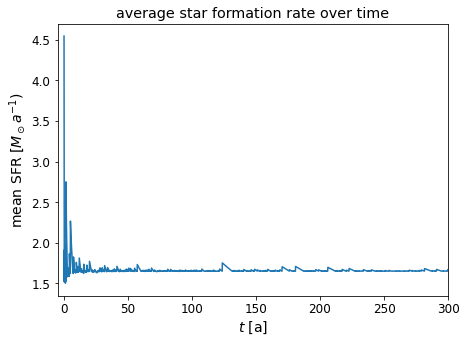

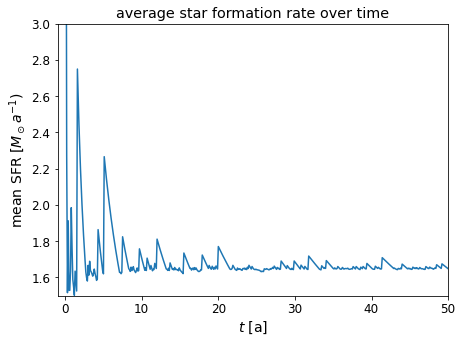

In [38]:
#plt.figure(figsize=(7,5))
#plt.plot(years, avglistyear)
#plt.title('average star formation rate over time')
#plt.xlabel('$t$ [a]', size=14)
#plt.ylabel('mean SFR [$M_\odot a^{-1}$)', size=14)
#plt.xlim([-200,10100])
#plt.ylim([1.1,5.5])
#plt.savefig('SFR sim 5 SFR')
#plt.show()

plt.figure(figsize=(7,5))
plt.plot(years, avglistyear)
plt.title('average star formation rate over time')
plt.xlabel('$t$ [a]', size=14)
plt.ylabel('mean SFR [$M_\odot a^{-1}$)', size=14)
plt.xlim([-5,300])
#plt.ylim([1.1,2.6])
#plt.savefig('SFR sim 5 SFR part')
plt.show()

plt.figure(figsize=(7,5))
plt.plot(years, avglistyear)
plt.title('average star formation rate over time')
plt.xlabel('$t$ [a]', size=14)
plt.ylabel('mean SFR [$M_\odot a^{-1}$)', size=14)
plt.xlim([-1,50])
plt.ylim([1.5,3])
#plt.savefig('SFR sim 5 SFR part 2')
plt.show()

In [6]:
#print(L10sum)
print(L10log)

[5.905018426113984, 1.9295428663739387, 5.069481510590445, 5.064974706827521, 8.798858107665794, 2.3718510453748687, 5.663987963076544, 6.77268361408367, 1.453689160631167, 8.552305740259063, 5.903980312936639, 8.330690262861598, 8.515977488458205, 6.150298447532519, 5.43444664973815, 4.166931071422737, 3.0380527432254105, 7.291161709167984, 3.1813292721454567, 4.651558482564183, 8.091131555111955, 4.963534218728776, 3.0314954043720688, 5.865166534346496, 8.334472597874415, 1.9861120820652707, 2.3336307346664373, 4.190773674862063, 1.8300196061855238, 4.386183339773931, 6.794816952714532, 4.986100120931775, 5.276125018731121, 3.6533099232545343, 2.6569911842080596, 4.735315313480274, 5.419879885933916, 5.605487501010732, 4.062325445717113, 10.974593029250311, -5, 2.659124879272464, 3.6673811934091147, 6.8934570602418335, 5.487163617058848, 5.759063205296608, 2.526787094149493, 2.938654041777579, 4.8558175111886275, 2.969869114643677, 2.4947310035194428, 8.159661331224049, 2.88908183792